## Lab Test 
- จินตนา เกสพนิช
- 64130701943
- DBIS39 


### คำแนะนำสำหรับเตรียมเครื่องสอบ (เครื่องที่คณะ)
1. ตรวจสอบที่ drive C มีโฟลเดอร์ Python310 หรือเวอร์ชั่นอื่น 
2. ที่ Start Menu เปิด Setting ค้นหา Environment variables 
3. ที่หน้าต่าง System Properties คลิก Environment Variables... (อยู่ขวาล่าง)
4. ส่วนของ User variables for ... เลือก Path
5. กด New แล้ว กด Browse... ไปยังโฟลด์ Python310 ในข้อ 1  
6. สร้างโฟลเดอร์เก็บงาน อาจจะ desktop ก็ได้ แล้วเข้าไปยัง folder นั้น 
7. พิมพ์ cmd ที่แถบแสดงเส้นทางของโฟลเดอร์ 
8. สร้าง virtual environment โดยพิมพ์ python -m venv ml-env (ใช้ชื่ออื่นแทน ml-env ก็ได้)
9. พิมพ์ ml-env\Scripts\activate
10. พิมพ์ pip install -r requirements.txt  เพื่อติดตั้ง packages ในไฟล์ requirements.txt  
11. พิมพ์ jupyter-lab เพื่อเปิด editor ในการเขียนโค้ด 


## สร้างโมเดลเพื่อทำนายการป่วนเป็นโรคหัวใจ (Heart Disease)

กำหนดข้อมูลในไฟล์ heart.csv  โดยนำมาจาก: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### งานที่ต้องทำ 
- สร้างโมเดลทำนายการเป็นโรคหัวใจ โดยใช้ ML 5 วิธี และเปรียบเทียบประสิทธิภาพ 
- เลือกวิธีการสร้างโมเดลที่ดีที่สุดที่ได้จากการทดลองและวิเคราะห์ในข้อ 1 มาสร้างโมเดลเพื่อใช้ในการทำระบบทำนาย 
- Deploy โมเดลในรูปแบบของ Web Application โดยใช้ streamlit 

## Prepare Data

In [1]:
import numpy as np 
import pandas as pd 

### 1. อ่านข้อมูลจากไฟล์ "heart.csv" เก็บไว้ที่ตัวแปร df_org

In [4]:
df_org = pd.read_csv("heart.csv")
df_org.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df_org.shape

(918, 12)

In [6]:
df_org.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### 2. คัดลอก  df_org เก็บไว้ที่ตัวแปร df

In [7]:
df = df_org.copy()

### 3. ตรวจสอบว่ามีข้อมูลสูญหายหรือไม่  

In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 4. สร้างตัว Encoder ข้อมูลที่เป็น Categorical ให้เป็นตัวเลข โดยใช้ LabelEncoder สำหรับคอลัมน์ 'Sex', 'ChestPainType', 'RestingBP', 'ExerciseAngina', 'ST_Slope' 

In [9]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

Sex_encoder = LabelEncoder()
ChestPainType_encoder = LabelEncoder()
RestingECG_encoder = LabelEncoder()
ExerciseAngina_encoder = LabelEncoder()
ST_Slope_encoder = LabelEncoder()

### 5. ทำให้ Encoder จดจำรูปแบบและแปลงข้อมูล คอลัมน์ 'Sex', 'ChestPainType', 'RestingBP', 'ExerciseAngina', 'ST_Slope'

In [11]:
df['Sex'] = Sex_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = ChestPainType_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = ExerciseAngina_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = ST_Slope_encoder.fit_transform(df['ST_Slope'])

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### 6. ตรวจสอบ และบันทึกตัว Encoder 

In [13]:
import pickle

print(Sex_encoder.classes_)
print(ChestPainType_encoder.classes_)
print(RestingECG_encoder.classes_)
print(ExerciseAngina_encoder.classes_)
print(ST_Slope_encoder.classes_)

pickle.dump(Sex_encoder, open('encoder.Sex.sav', 'wb'))
pickle.dump(ChestPainType_encoder, open('encoder.ChestPainType.sav', 'wb'))
pickle.dump(RestingECG_encoder, open('encoder.RestingECG.sav', 'wb'))
pickle.dump(ExerciseAngina_encoder, open('encoder.ExerciseAngina.sav', 'wb'))
pickle.dump(ST_Slope_encoder, open('encoder.ST_Slope.sav', 'wb'))


[0 1]
['ASY' 'ATA' 'NAP' 'TA']
['LVH' 'Normal' 'ST']
['N' 'Y']
['Down' 'Flat' 'Up']


### 7. สร้างตัวแปร X สำหรับเก็บ features ที่ประกอบด้วยข้อมูลใน df ทั้งหมด ยกเว้น คอลัมน์  'HeartDisease'  และสร้างตัวแปร y สำหรับเก็บ class โดยใช้ข้อมูลในคอลัมน์ 'HeartDisease'

In [14]:
#  X = features and y = label/class.
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [15]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [16]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### 8. แบ่งข้อมูล X และ y สำหรับ Train (X_train, y_train) และ Test (X_test, y_test) 

โดยใช้ train_test_split กำหนด  test_size=0.2 

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=123)

## Create Model & Evaluate 

### 9. สร้างตัวแปร evaluations แบบ DataFram สำหรับเก็บผลการประเมิน โดยกำหนด columns=['Accuracy','F1', 'Precision', 'Recall'] 

และ index=['Decision Tress', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost']  โดยที่ Index เป็นวิธีที่เราจะนำมาสร้างโมเดล หากนักศึกษาใช้โมเดลอื่นให้เปลี่ยนชื่อให้เหมาะสม 

In [18]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

evaluations = pd.DataFrame(columns=['Accuracy','F1', 'Precision', 'Recall'], index=['Decision Tress', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost'])


### 10. Decision Tress  

- สร้างโมเดลโดยใช้ DecisionTreeClassifier และวัดผล 
- แสดงผลโดยใช้ classification_report
- เก็บค่าผลประเมิน ได้แก่ 'Accuracy','F1', 'Precision', 'Recall' ลงในตัวแปร evaluations 
- หา confusion matrix และแสดงผล 


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.7831    0.8025    0.7927        81
           1     0.8416    0.8252    0.8333       103

    accuracy                         0.8152       184
   macro avg     0.8124    0.8139    0.8130       184
weighted avg     0.8159    0.8152    0.8154       184

               Accuracy     F1 Precision Recall
Decision Tress    81.52  81.54     81.59  81.52
Random Forest       NaN    NaN       NaN    NaN
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


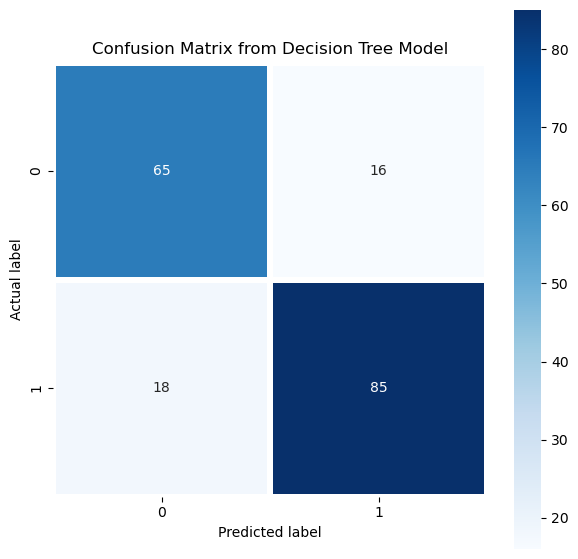

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier= DecisionTreeClassifier()

dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['Decision Tress'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Decision Tree Model")
plt.show()

### 11. Random Forest 
- สร้างโมเดลโดยใช้ RandomForestClassifier และวัดผล 
- แสดงผลโดยใช้ classification_report
- เก็บค่าผลประเมิน ได้แก่ 'Accuracy','F1', 'Precision', 'Recall' ลงในตัวแปร evaluations 
- หา confusion matrix และแสดงผล 

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8767    0.7901    0.8312        81
           1     0.8468    0.9126    0.8785       103

    accuracy                         0.8587       184
   macro avg     0.8618    0.8514    0.8548       184
weighted avg     0.8600    0.8587    0.8577       184

               Accuracy     F1 Precision Recall
Decision Tress    81.52  81.54     81.59  81.52
Random Forest     85.87  85.77      86.0  85.87
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


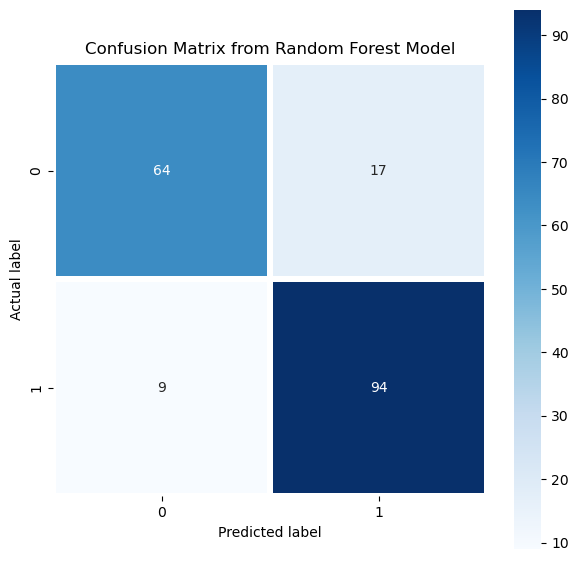

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(random_state=0)


rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['Random Forest'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Random Forest Model")
plt.show()


### 12. KNN
- สร้างโมเดลโดยใช้ KNeighborsClassifier และวัดผล 
- แสดงผลโดยใช้ classification_report
- เก็บค่าผลประเมิน ได้แก่ 'Accuracy','F1', 'Precision', 'Recall' ลงในตัวแปร evaluations 
- หา confusion matrix และแสดงผล 

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.6835    0.6667    0.6750        81
           1     0.7429    0.7573    0.7500       103

    accuracy                         0.7174       184
   macro avg     0.7132    0.7120    0.7125       184
weighted avg     0.7167    0.7174    0.7170       184

               Accuracy     F1 Precision Recall
Decision Tress    81.52  81.54     81.59  81.52
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


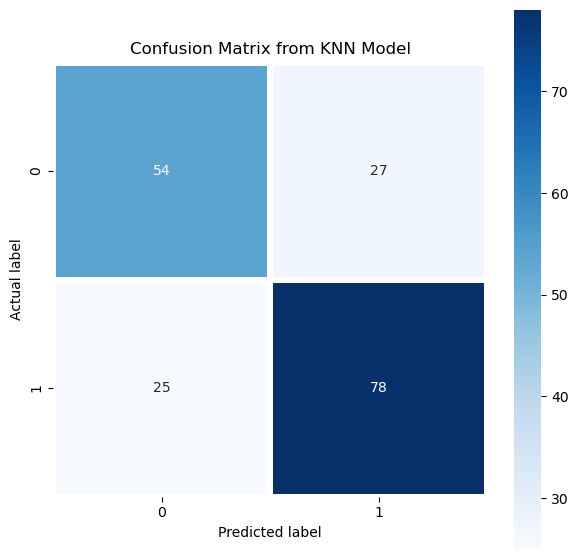

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()


knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['KNN'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from KNN Model")
plt.show()

### 13. AdaBoost Classifier
- สร้างโมเดลโดยใช้ AdaBoostClassifier และวัดผล 
- แสดงผลโดยใช้ classification_report
- เก็บค่าผลประเมิน ได้แก่ 'Accuracy','F1', 'Precision', 'Recall' ลงในตัวแปร evaluations 
- หา confusion matrix และแสดงผล 


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8356    0.7531    0.7922        81
           1     0.8198    0.8835    0.8505       103

    accuracy                         0.8261       184
   macro avg     0.8277    0.8183    0.8213       184
weighted avg     0.8268    0.8261    0.8248       184

               Accuracy     F1 Precision Recall
Decision Tress    81.52  81.54     81.59  81.52
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost          82.61  82.48     82.68  82.61
XGBoost             NaN    NaN       NaN    NaN


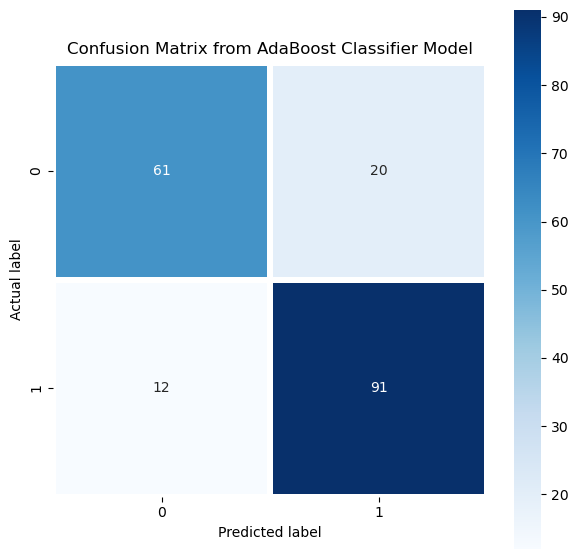

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_train,y_train)
y_pred=ada_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['AdaBoost'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from AdaBoost Classifier Model")
plt.show()





### 14. XGBoost
- สร้างโมเดลโดยใช้ XGBClassifier และวัดผล 
- แสดงผลโดยใช้ classification_report
- เก็บค่าผลประเมิน ได้แก่ 'Accuracy','F1', 'Precision', 'Recall' ลงในตัวแปร evaluations 
- หา confusion matrix และแสดงผล 


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.8267    0.7654    0.7949        81
           1     0.8257    0.8738    0.8491       103

    accuracy                         0.8261       184
   macro avg     0.8262    0.8196    0.8220       184
weighted avg     0.8261    0.8261    0.8252       184

               Accuracy     F1 Precision Recall
Decision Tress    81.52  81.54     81.59  81.52
Random Forest     85.87  85.77      86.0  85.87
KNN               71.74   71.7     71.67  71.74
AdaBoost          82.61  82.48     82.68  82.61
XGBoost           82.61  82.52     82.61  82.61


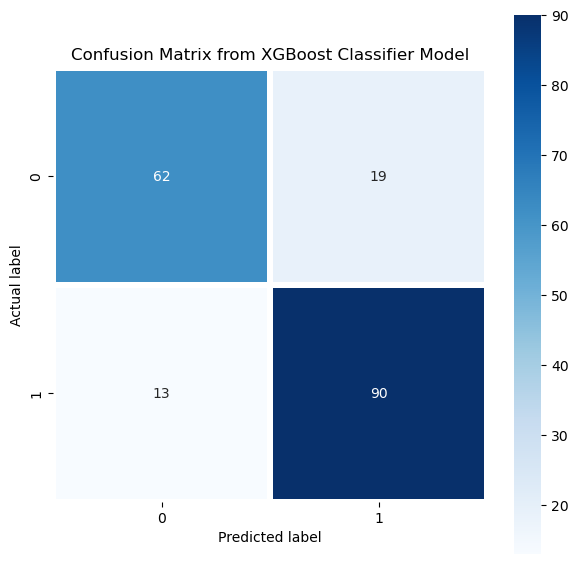

In [23]:

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['XGBoost'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from XGBoost Classifier Model")
plt.show()


### 15. บันทึกผลการประเมินทั้งหมดใน evaluations ไว้ที่ไฟล์ 'evals.all.sav'

In [24]:
import pickle
pickle.dump(evaluations, open('evals.all.sav', 'wb'))

## Select Model & Create Model &  Save Model

### 16. เลือกโมเดล ที่ดีที่สุด และอธิบาย 

ตอบ โมเดล Random Forest ที่ดีที่สุด เพราะมีค่า Accuracy, F1, Precision, และ Recallสูงที่สุดเมื่อเทียบกับอีก 4 โมเดลที่เหลือ


### 17. สร้าง model โดยใช้ข้อมูลทั้งหมด X,y และบันทึกไว้ที่ไฟล์ 'model.heart.sav'

In [25]:
import pickle
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X,y)

pickle.dump(model, open('model.heart.sav', 'wb'))
pickle.dump(Sex_encoder, open('encoder.Sex.sav', 'wb'))
pickle.dump(ChestPainType_encoder, open('encoder.ChestPainType.sav', 'wb'))
pickle.dump(RestingECG_encoder, open('encoder.RestingECG.sav', 'wb'))
pickle.dump(ExerciseAngina_encoder, open('encoder.ExerciseAngina.sav', 'wb'))
pickle.dump(ST_Slope_encoder, open('encoder.ST_Slope.sav', 'wb'))
pickle.dump(evaluations, open('evals.all.sav', 'wb'))




## Deploy Model for Web App using Streamlit
- pip install streamlit
- python -m streamlit run fileapp.py
- https://docs.streamlit.io/knowledge-base/using-streamlit/how-do-i-run-my-streamlit-script
- https://docs.streamlit.io/library/api-reference



#### 18. สร้างไฟล์ app_main_xxx.py เมื่อ xxx แทนรหัสนักศึกษา 3 หลักสุดท้าย
- โค้ดด้านล่างให้มาบางส่วน ให้นักศึกษาปรับแก้ไขให้สมบูรณ์

In [26]:
%%writefile app_main_943.py

import streamlit as st 
import numpy as np
import pandas as pd
import plotly.graph_objects as px
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


model = pickle.load(open('model.heart.sav','rb'))

Sex_encoder = pickle.load(open('encoder.Sex.sav','rb'))
ChestPainType_encoder = pickle.load(open('encoder.ChestPainType.sav','rb'))
RestingECG_encoder = pickle.load(open('encoder.RestingECG.sav','rb'))
ExerciseAngina_encoder = pickle.load(open('encoder.ExerciseAngina.sav','rb'))
ST_Slope_encoder = pickle.load(open('encoder.ST_Slope.sav','rb'))

evaluations = pickle.load(open('evals.all.sav','rb'))

st.title('Heart Disease Prection')

tab1, tab2 = st.tabs(["Prediction", "Model Evaluations"])


with tab1:
    
    #'Age'
    x1 = st.slider('Age', 0, 100, 30)

    #'Sex'
    x2 = st.radio('Select Sex', Sex_encoder.classes_)
    x2 = Sex_encoder.transform([x2])[0]

    #'ChestPainType'
    x3 = st.radio('Select ChestPainType', ChestPainType_encoder.classes_)
    x3 = ChestPainType_encoder.transform([x3])[0]

    #'RestingBP'
    x4 = st.slider('RestingBP', 0, 210, 130)

    #'Cholesterol'
    x5 = st.slider('Cholesterol', 0, 700, 180)

    #'FastingBS'
    x6 = st.slider('FastingBS', 0, 1, 0)

    #'RestingECG'
    x7 = st.radio('Select RestingECG', RestingECG_encoder.classes_)
    x7 = RestingECG_encoder.transform([x7])[0]

    #'MaxHR'....
    x8 = st.slider('MaxHR', 60, 202, 120)

    #'ExerciseAngina'
    x9 = st.radio('Select ExerciseAngina', ExerciseAngina_encoder.classes_)
    x9 = ExerciseAngina_encoder.transform([x9])[0]

    #'Oldpeak'....
    x10 = st.slider('Oldpeak', -2.6, 6.2, 2.68)

    #'ST_Slope'
    x11 = st.radio('Select ST_Slope', ST_Slope_encoder.classes_)
    x11 = ST_Slope_encoder.transform([x11])[0]

    x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]).reshape(1,-1), 
                 columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                           'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

    pred = model.predict(x_new)

    st.header('Predicted Result: ' , )

    if pred ==0 : 
        st.subheader('Normal')
    else :
        st.subheader('Heart Disease')

    #HeartDisease: output class [1: heart disease, 0: Normal]
    
with tab2:
    import plotly.graph_objects as px
    
    evaluations = pickle.load(open('evals.all.sav','rb'))

    x = evaluations.columns
    fig = px.Figure(data=[
        px.Bar(name = 'Decision Tree',
               x = x,
               y = evaluations.loc['Decision Tress']),
        px.Bar(name = 'Random Forest',
               x = x,
               y =  evaluations.loc['Random Forest']),
        px.Bar(name = 'KNN',
               x = x,
               y =  evaluations.loc['KNN']),
        px.Bar(name = 'AdaBoost',
               x = x,
               y =  evaluations.loc['AdaBoost']),
        px.Bar(name = 'XGBoost',
               x = x,
               y =  evaluations.loc['XGBoost'])
    ])
        
    st.plotly_chart(fig, use_container_width=True)

    st.dataframe(evaluations)
    


Writing app_main_943.py


#### 19. ทดสอบการทำงานบนเครื่องที่ใช้สอบ และ capture หน้าผลการทำงาน บน localhost  


แปะรูป ... 

### 20. deploy บน https://streamlit.io/  แล้วส่งลิงค์ผลการ deploy ที่สามารถทำนายได้ ด้านล่าง 

นักศึกษาอาจต้องปรับแก้ไข requirements.txt เพื่อการ deploy โดยตรวจเช็ค package ที่ใช้โดยพิมพ์ pip list

และใส่เท่าที่จำเป็น เช่น ควรต้องนำ jupyterlab ออก เพราะไม่จำเป็นต้องใช้ในการ deploy

แปะลิงค์ ...